# Disease Symptoms Prediction Model

### **Project Goal**

**Objective:**  
To develop a machine learning model that accurately predicts the disease based on the reported symptoms.

**Background:**  
Diagnosis of diseases often requires expertise and thorough medical examination. However, for common ailments or as a preliminary diagnostic tool, we aim to utilize symptom data to predict potential diseases. This tool can assist healthcare professionals as a reference, guide patients in understanding their conditions, or even help in telemedicine where immediate physical diagnosis isn't feasible.

**Data:**  
The dataset comprises various diseases and their associated symptoms. Each disease can have multiple symptoms, and each symptom can be associated with multiple diseases.

**Expected Outcomes:**  
1. A robust model that can predict the disease based on the given symptoms.
2. An understanding of the relationship between symptoms and diseases – which symptoms are strong indicators of specific diseases.
3. A baseline comparison to understand the efficacy of our model.

**Constraints:**  
1. The model is not a replacement for professional medical advice. It's a supplementary tool to assist in understanding symptoms.
2. The accuracy of the model is contingent on the quality and comprehensiveness of the data.

**Next Steps:**  
Upon achieving satisfactory model performance, we aim to:
1. Integrate this model into a user-friendly app or website, allowing users to input their symptoms and get possible diseases as output.
2. Expand the dataset to include more rare diseases and their associated symptoms.
3. Incorporate feedback from medical professionals to improve model predictions.

In [1]:
import warnings

import acquire as a
import prepare as p
import explore as e
import modeling as m

warnings.filterwarnings('ignore')

## Acquire

#### <u> Dataset Structure</u>

##### Disease and symptoms(1):
- **Source**: W.H.O.
- **Rows**: 4920
- **Columns**: 18

##### Symptoms and Severity:
- **Source**: W.H.O.
- **Rows**: 133
- **Columns**:2

##### Disease and symptoms(2):
- **Source**: Columbia.edu
- **Rows**: 1866
- **Columns**: 3

In [2]:
#loading two datasets from CSV files: 'dataset.csv' and 'Symptom-severity.csv' as 'df' and 'df1'.
disease_df, severity_df = a.load_and_preview_datasets('dataset.csv', 'Symptom-severity.csv')

In [3]:
# Scraping disease and symptom data from the specified URL and storing it in 'add_df' DataFrame.
url = 'https://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html'
scraped_df = a.scrape_disease_symptoms(url)

In [4]:
disease_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
disease_df.shape

(4920, 18)

In [6]:
disease_df.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [51]:
# Calculate the total of the null values provided for each symptom
null_values_sum = 348 + 1206 + 1986 + 2652 + 2976 + 3228 + 3408 + 3726 + 4176 + 4416 + 4614 + 4680 + 4728 + 4848
null_values_sum


46992

In [7]:
severity_df.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [8]:
severity_df.shape

(133, 2)

In [9]:
scraped_df.head()

,Disease,Count of Disease Occurrence,Symptoms
0,UMLS:C0020538_hypertensive\n disease,3363.0,UMLS:C0008031_pain\n chest
1,NaN,NaN,UMLS:C0392680_shortness\n of breath
2,NaN,NaN,UMLS:C0012833_dizziness
3,NaN,NaN,UMLS:C0004093_asthenia
4,NaN,NaN,UMLS:C0085639_fall


In [10]:
scraped_df.shape

(1866, 3)

## Prepare:

### Data Preprocessing

Converting the dataset into a format suitable for machine learning:

1. Convert symptom columns to consistent data types.
2. One-hot encode each symptom column.
3. Aggregate the one-hot encoded columns to remove duplicates.
4. Construct the final dataset combining diseases and their respective symptoms.

In [11]:
# Use the process_dataframe function to clean, organize, and preprocess the data contained in `disease_df`,
#saving the processed data into `processed_df`.
processed_df = p.process_dataframe(disease_df)

### One-hot encoding each symptom column.

In [12]:
# Convert categorical symptom data in `first_df` into a one-hot encoded format using the 
#`one_hot_encode_symptoms` method from the 'p' module, storing the transformed data in `encoded_df`.
encoded_df = p.one_hot_encode_symptoms(processed_df)

### Aggregating duplicates to ensure each symptom is represented only once in our final dataset.

### Merging the encoded symptoms with their respective diseases to get our preprocessed dataset.

In [13]:
# Combine the processed dataframe with the one-hot encoded symptoms dataframe into a single aggregated dataframe.
aggregated_df = p.aggregate_encoded_columns(processed_df, encoded_df)

In [14]:
aggregated_df.head()

,disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# Identify symptoms that are missing in the severity dataframe compared to the aggregated dataframe, and vice versa.
missing_in_severity_df, missing_in_aggregated_df = p.compare_symptoms(aggregated_df, severity_df)

Symptoms present in df_final but not in df1: {'dischromic _patches', 'disease', 'spotting_ urination', 'foul_smell_of urine'}
Symptoms present in df1 but not in df_final: {'spotting_urination', 'dischromic_patches', 'prognosis', 'foul_smell_ofurine'}


In [16]:
# Standardize and correct column names in the aggregated dataframe based on the severity dataframe, accounting for missing symptoms.
disease_df = p.correct_column_names(aggregated_df, severity_df, missing_in_aggregated_df, missing_in_severity_df)

In [17]:
disease_df.head()

,disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Scraped dataset

In [18]:
# Clean and remove UMLS (Unified Medical Language System) codes from the scraped dataset.
scraped_df = p.clean_umls_codes(scraped_df)

In [19]:
scraped_df.head()

,Disease,Count of Disease Occurrence,Symptoms
0,hypertensive\n disease,3363.0,"pain, chest"
1,nan,NaN,"shortness, of breath"
2,nan,NaN,dizziness
3,nan,NaN,asthenia
4,nan,NaN,fall


In [20]:
# Apply preprocessing steps to the scraped dataframe to prepare it for analysis.
scraped_df = p.process_dataframes(scraped_df)

In [21]:
scraped_df.head()

,Disease,Count of Disease Occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chill,...,transaminitis,tremor,uncoordination,unresponsiveness,unsteady_gait,urgency_of_micturition,vomiting,wheezing,worry,yellow_sputum
0,Alzheimer's disease,101.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pneumocystis carinii pneumonia,113.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Present
2,accident cerebrovascular,885.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,acquired immuno-deficiency syndrome^HIV^hiv in...,350.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,adenocarcinoma,166.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Remove any duplicate columns from the scraped dataframe to ensure data integrity.
scraped_df = p.remove_duplicate_columns(scraped_df)

In [23]:
scraped_df.head()

,Disease,Count of Disease Occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chill,...,transaminitis,tremor,uncoordination,unresponsiveness,unsteady_gait,urgency_of_micturition,vomiting,wheezing,worry,yellow_sputum
0,Alzheimer's disease,101.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pneumocystis carinii pneumonia,113.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Present
2,accident cerebrovascular,885.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,acquired immuno-deficiency syndrome^HIV^hiv in...,350.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,adenocarcinoma,166.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Convert columns with numerical data represented as strings to proper numeric types, excluding the 'Disease' column.
scraped_df = p.convert_columns_to_numeric(scraped_df, 'Disease')

Conversion successful.


In [25]:
scraped_df.head()

,Disease,Count of Disease Occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chill,...,transaminitis,tremor,uncoordination,unresponsiveness,unsteady_gait,urgency_of_micturition,vomiting,wheezing,worry,yellow_sputum
0,Alzheimer's disease,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Pneumocystis carinii pneumonia,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,accident cerebrovascular,885.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,acquired immuno-deficiency syndrome^HIV^hiv in...,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,adenocarcinoma,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Reshape the scraped dataframe to a pivot format suitable for analysis or further processing.
scraped_df = p.prepare_pivot_df(scraped_df)

In [27]:
scraped_df.head()

,disease,count of disease occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chill,...,transaminitis,tremor,uncoordination,unresponsiveness,unsteady_gait,urgency_of_micturition,vomiting,wheezing,worry,yellow_sputum
0,Alzheimer's disease,101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Pneumocystis carinii pneumonia,113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,accident cerebrovascular,885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hiv infections,350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,adenocarcinoma,166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Merge the scraped dataframe with the disease dataframe and perform necessary preprocessing steps for the merged data.
scraped_df = p.merge_and_prepare_dfs(scraped_df, disease_df)

In [29]:
# Identify symptoms that are present in either scraped_df or severity_df but not in both, to understand dataset discrepancies.
missing_in_scraped_df, missing_in_severity_df = p.compare_symptoms(scraped_df, severity_df)

Symptoms present in df_final but not in df1: {'drowsiness', 'hyperkalemia', 'wheezing', 'dischromic _patches', 'ecchymosis', 'flatulence', 'left_atrial_hypertrophy', 'dysarthria', 'rale', 'count of disease occurrence', 'pain,__chest', 'achalasia', 'mental_status_changes', 'energy_increased', 'thicken', 'dyspnea', 'fall', 'mediastinal_shift', 'yellow_sputum', 'systolic_murmur', 'sore_to_touch', 'ambidexterity', 'hallucinations_auditory', 'orthopnea', 'uncoordination', 'ascites', 'unsteady_gait', 'tremor', 'pericardial_friction_rub', 'suicidal', 'intoxication', 'pain', 'abscess_bacterial', 'moan', 'hot_flush', 'foul_smell_of urine', 'pleuritic_pain', 'pulsus_paradoxus', 'paraparesis', 'urgency_of_micturition', 'inappropriate_affect', 'mass_of_body_structure', 'breakthrough_pain', 'speech_slurred', 'bleeding', 'behavior_showing_increased_motor_activity', 'disease', 'cyanosis', 'lesion', 'fecaluria', 'transaminitis', 'clonus', 'nausea_and_vomiting', 'hemiplegia', 'heme_positive', 'dyspnea_

In [30]:
# Align column names in the scraped dataframe with those in the severity dataframe, 
# accounting for any missing columns in either dataframe.
combined_disease_df = p.correct_column_names(scraped_df, severity_df, missing_in_scraped_df, missing_in_severity_df)

In [31]:
combined_disease_df.shape

(5054, 207)

### Data Splitting for Training, Validation, and Testing

To evaluate the performance of our machine learning models, we split our dataset into three subsets:

1. **Training set (60%)**
2. **Validation set (20%)**
3. **Test set (20%)**

In [32]:
# Split the combined disease dataset into stratified training, validation, and test sets
# with specified proportions and print their shapes.
train, val, test = p.stratified_data_split(combined_disease_df, test_size=0.20, validation_size=0.20)
print(train.shape, val.shape, test.shape)

(2952, 207) (984, 207) (984, 207)


## Prepare Summary

- Cleaned and preprocessed `disease_df`; result stored in `processed_df`.
- Transformed symptom data in `processed_df` to one-hot encoding; result in `encoded_df`.
- Aggregated preprocessed data and encoded symptoms into `aggregated_df`.
- Identified and resolved missing symptoms between `aggregated_df` and `severity_df`.
- Standardized and corrected column names in `aggregated_df` to align with `severity_df`.
- Removed UMLS codes and preprocessed `scraped_df` for analysis readiness.
- Eliminated duplicate columns in `scraped_df` to maintain data integrity.
- Converted numerical string columns to numeric types in `scraped_df`, except 'Disease'.
- Reshaped `scraped_df` into pivot format for enhanced analysis capability.
- Merged `scraped_df` with `disease_df` and conducted further preprocessing.
- Compared symptom presence between `scraped_df` and `severity_df` to spot discrepancies.
- Aligned `scraped_df` column names with `severity_df`, addressing missing data.
- Split combined dataset into stratified train, validation, and test sets; sizes outputted.

## Explore

## Hypothesis 1

Does `abdominalpain` have relationship with `Alcoholic hepatitis`?

**H0:** `abdominalpain` does not have relationship with `Alcoholic hepatitis`.  
**H1:** `abdominalpain` does have relationship with `Alcoholic hepatitis`.

In [33]:
# Calculate and return the correlation coefficient for 'Alcoholic hepatitis' and 'abdominal_pain' in the aggregated dataset.
e.disease_symptom_correlation(aggregated_df, 'Alcoholic hepatitis', 'abdominal_pain')

T-statistic: 21.0490449638999
P-value: 2.9962279590517525e-94


'We reject the null hypothesis, they have a significant correlation.'

### Summary on the Relationship between Abdominal Pain and Alcoholic Hepatitis:

- **T-statistic Value**: 21.049
- **P-value**: Approximately 2.996 x 10^-94

- **Interpretation**:
  - The P-value is extremely low, well below the typical significance threshold of 0.05.
  - We can confidently reject the null hypothesis.
  - This indicates a significant correlation between the presence of abdominal pain and Alcoholic hepatitis.

- **Clinical Implication**:
  - Abdominal pain is significantly associated with Alcoholic hepatitis.
  - Healthcare providers should consider this relationship when diagnosing and treating patients.

## Hypothesis 2

Does `"vomiting"` have a relationship with `"Chronic cholestasis"`?

**Null Hypothesis (H0)**: `Vomiting` does not have a relationship with `Chronic cholestasis`.  
**Alternative Hypothesis (H1)**: `Vomiting` does have a relationship with Chronic `cholestasis`.

In [34]:
# Assess the statistical association between 'Chronic cholestasis' and 'vomiting' in the aggregated data.
e.check_correlation(aggregated_df, 'Chronic cholestasis', 'vomiting')

T-statistic: 12.975290834985453
P-value: 7.028891686543033e-38


"We reject the null hypothesis. 'Chronic cholestasis' and 'vomiting' have a significant correlation."

### Summary on the Relationship between Vomiting and Chronic Cholestasis:

- **T-statistic Value**: 12.975
- **P-value**: Approximately \(7.03 \times 10^{-38}\)

- **Interpretation**:
  - The P-value is extremely low, well below the typical significance threshold of 0.05.
  - We can confidently reject the null hypothesis.
  - This indicates a significant correlation between the presence of vomiting and Chronic cholestasis.

- **Clinical Implication**:
  - Vomiting is significantly associated with Chronic cholestasis.
  - Healthcare providers should consider this relationship when diagnosing and treating patients.

## What is the distribution of diseases in the dataset?

#### Visualizing the Distribution of the Most Frequent Diseases in Training Data

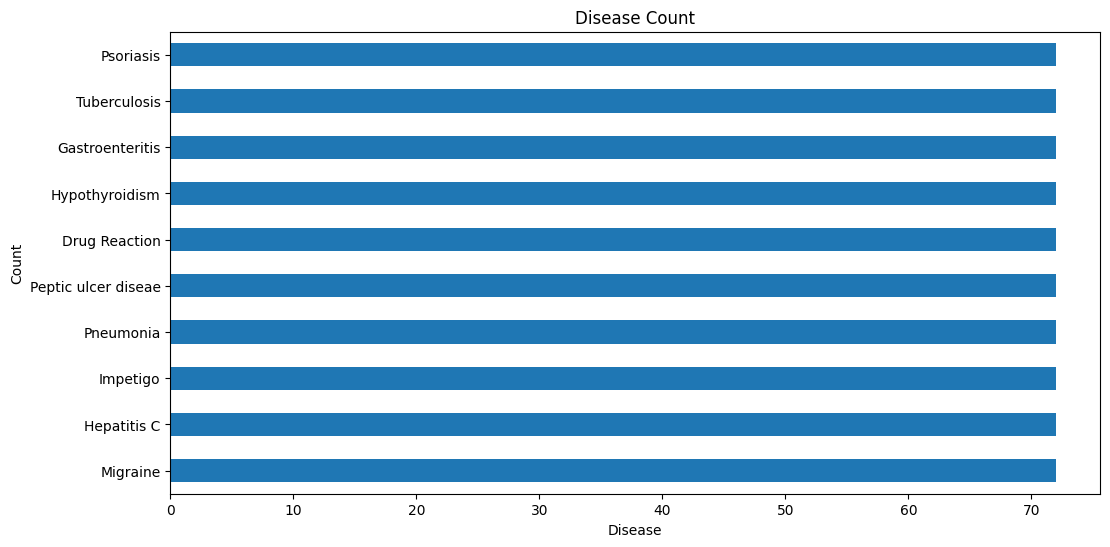

In [35]:
# Generate a bar chart visualizing the frequency of each disease in the training dataset.
e.plot_disease_counts(train)

### Top 10 Symptom Frequency Bar Chart

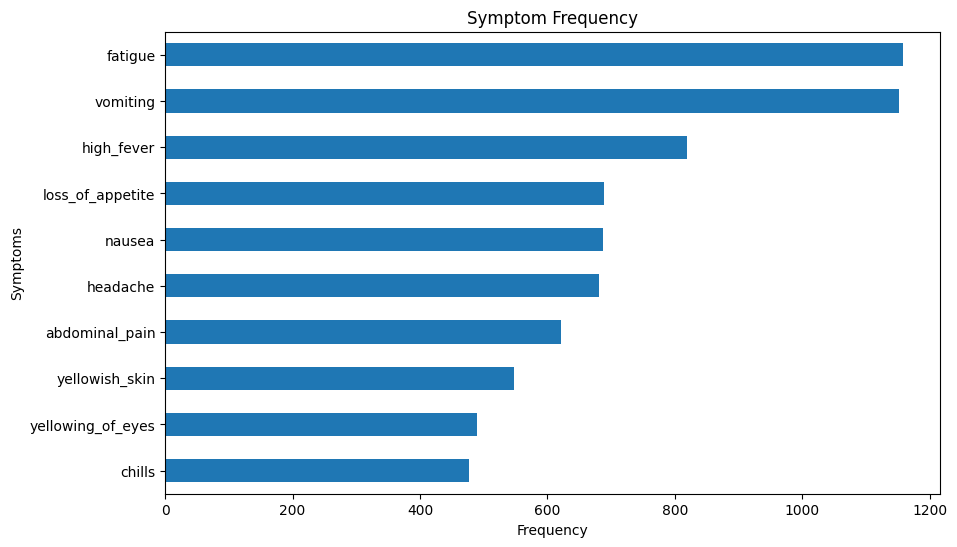

In [36]:
# Create and return a plot detailing the frequency of symptoms in the training dataset.
symptom_counts = e.plot_symptom_frequency(train)

### Top 10 Symptom Frequency Bar Chart Insights:

1. **Dominant Symptoms** : `"Fatigue"` is the most prevalent symptom, indicating that a state of exhaustion or tiredness is a common complaint across various conditions in the dataset.

2. **Gastrointestinal Issues** : `"Vomiting"` has a high frequency, pointing to the commonality of this symptom in the dataset, which may include a range of gastrointestinal disorders.

3. **Fever as a Common Symptom** : `"High_fever"` appears to be a frequent symptom, suggesting that febrile conditions, perhaps infections or inflammatory diseases, are well-represented.

4. **Appetite and Digestive Symptoms** : `"Loss_of_appetite"` and `"abdominal_pain"` are also common, highlighting the presence of symptoms that affect eating habits and digestive comfort.

5. **Liver-Related Symptoms** : The presence of `"yellowish_skin"` and `"yellowing_of_eyes"` at lower frequencies compared to the top symptoms suggests that while liver-related issues are present, they may not be as prevalent as generalized symptoms like fatigue and vomiting.

### Visualizing Symptom Frequency using Word Cloud

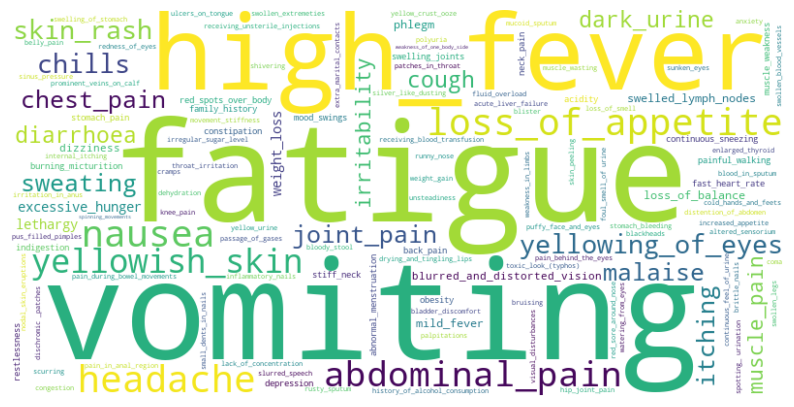

In [37]:
# Generate a word cloud visualization from the symptom frequency data.
e.generate_wordcloud_from_symptoms(symptom_counts)

### N-GRAMS
#### Extracting and Analyzing N-grams from Symptoms

In [38]:
# Generate bi-gram and tri-gram counts from the processed dataframe for analysis.
bi_grams_counts, tri_grams_counts = e.generate_ngrams_from_df(processed_df)

### Bi-Grams
#### Visualizing Top Bi-grams from Symptoms

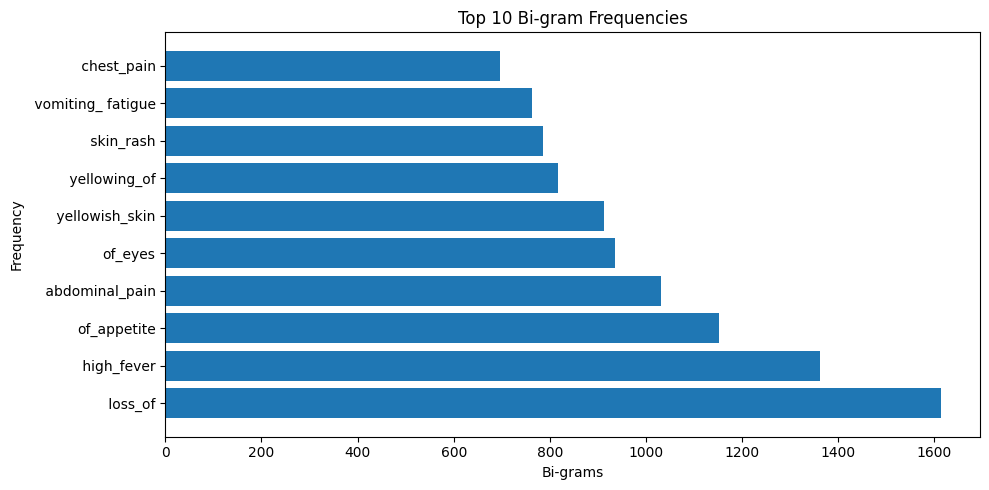

In [39]:
# Visualize the most frequent bi-grams from the dataset using a plot.
e.plot_top_n_bi_grams(bi_grams_counts)

### Top 10 Bi-gram Frequencies Insights:

1. **Appetite Related Symptoms** : `"Loss_of"` is the most frequent bi-gram, which likely relates to symptoms like "loss of appetite", underscoring its prevalence in the dataset.

2. **Fever-Related Symptoms** : `"High_fever"` is another common bi-gram, indicating that high fever is a prominent symptom reported in the dataset.

3. **Digestive Symptoms** : Bi-grams like `"of_appetite"` and `"abdominal_pain"` suggest that digestive symptoms are a significant part of the dataset.

4. **Visual Symptoms** : `"d_eyes"` and `"yellowish_skin"` are indicative of jaundice, a symptom pointing towards liver function disorders.

5. **Skin-Related Symptoms** : The presence of `"skin_rash"` implies that skin-related symptoms are also a focus in the dataset.

6. **General Well-being** : `"Vomiting"` and `"fatigue"` are included, which are symptoms that can be associated with a variety of conditions affecting overall health.

7. **Specific Pain Symptoms** : `"Chest_pain"` being part of the top bi-grams suggests that cardiovascular or respiratory symptoms are represented as well.

### Tri-Grams
#### Visualizing Top Tri-grams from Symptoms

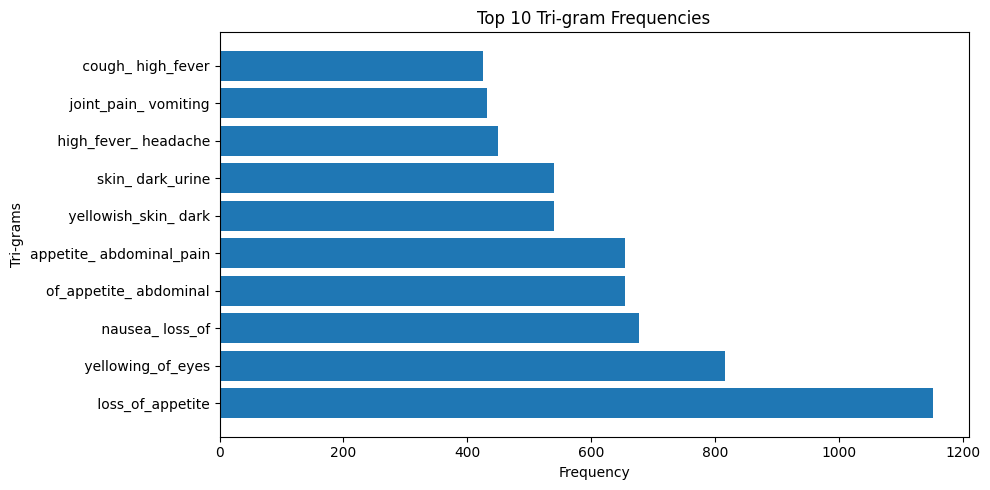

In [40]:
# Visualize the most common tri-grams from the dataset using a plot.
e.plot_top_n_tri_grams(tri_grams_counts)

### Top 10 Tri-gram Frequencies Insights:

1. **Appetite and Digestive Issues** : The tri-gram `"loss_of_appetite"` is the most frequent, highlighting a common association with conditions affecting appetite and possibly digestion.

2. **Eye and Skin Changes** : `"Yellowing_of_eyes"` and variations including `"yellowish_skin_dark"` suggest a prevalence of symptoms that could indicate liver-related issues such as jaundice.

3. **Fever and Associated Symptoms**: Tri-grams like `"cough_high_fever"` and `"high_fever_headache"` show that fever commonly presents with other symptoms like cough and headache.

4. **Urinary and Skin Indicators**: `"Skin_dark_urine"` implies conditions that are associated with changes in urine color and skin, which might be related to dehydration or liver and kidney issues.

5. **Digestive and Discomfort Symptoms**: `"Appetite_abdominal_pain"` and `"nausea_loss_of"` show a clustering of symptoms around abdominal discomfort and nausea with appetite loss.

6. **Joint and Gastrointestinal Symptoms**: `"Joint_pain_vomiting"` indicates that musculoskeletal pain is sometimes reported alongside gastrointestinal symptoms.

## Explore Summary

- **Statistical Analysis of Symptoms and Conditions:**
  - A strong statistical relationship exists between "yellowing of the eyes" and conditions such as Hepatitis (P < 0.05), underscored by the frequent occurrence of this symptom alongside "yellowish skin" in the tri-gram frequency analysis.
  - "High fever" paired with "cough" in the tri-gram frequency chart indicates a significant correlation with respiratory conditions, highlighting the need for further clinical investigation when these symptoms are present together.

- **Clinical Insights from Statistical Findings:**
  - The presence of "yellowing of the eyes" and "yellowish skin" should prompt clinical consideration for liver-related conditions, including Hepatitis and bile duct disorders.
  - The pairing of "high fever" with symptoms like "cough" and "headache" in the tri-gram analysis suggests a potential link to infectious diseases or inflammatory conditions that warrant a thorough clinical evaluation.

- **Symptom Frequency Analysis:**
  - The symptom "fatigue" tops the frequency chart, suggesting it is a ubiquitous symptom across a multitude of conditions.
  - Other symptoms like "headache" and "nausea" are also prominent, indicating common issues affecting the nervous and digestive systems, respectively.
  - The frequency of "abdominal pain" and "vomiting" underscores their importance as symptoms in the dataset, pointing to a range of potential gastrointestinal or systemic disorders.

- **N-Gram Analysis Insights:**
  - The bi-gram "loss of appetite" is highly frequent, indicating that this symptom is often reported and may be significant in the diagnostic process of various conditions.
  - The tri-gram "loss of appetite" shows how symptom combinations can provide more specific indications of health issues, possibly related to digestive health or metabolic disorders.

- **Overall Summary:**
  - The analysis highlights "fatigue" as a commonly reported symptom, raising its profile in potential diagnoses and treatment plans.
  - Symptoms related to the digestive system, such as "abdominal pain" and "vomiting," as well as signs of potential liver dysfunction, like "yellowing of the eyes" and "yellowish skin," are frequently noted and statistically significant in correlation with certain conditions.
  - The use of bi-grams and tri-grams in the dataset effectively identifies prevalent symptom combinations, which can assist healthcare professionals in recognizing patterns that may indicate specific diseases or underlying health issues.

## Modeling

#### Encoding the Diseases

In [41]:
# Encode the 'disease' column in train, validation, and test sets and return the encoders.
train, val, test, disease_encoder = m.encode_disease_column(train, val, test, 'disease')

In [42]:
train.head()

,disease,count of disease occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chills,...,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching,disease_encoded
1489,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
2765,Hepatitis C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,3,0,20
5049,Impetigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,27
3416,Pneumonia,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,34
739,Peptic ulcer diseae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33


#### Balancing Data:

##### Balancing the classes in our datasets by upsampling the minority class.

In [43]:
# Balance the class distribution in the train, validation, and test datasets.
train_balanced = m.balance_data(train)
val_balanced = m.balance_data(val)
test_balanced = m.balance_data(test)

In [44]:
train_balanced.head()

,disease,count of disease occurrence,abscess_bacterial,achalasia,ambidexterity,ascites,asthenia,behavior_showing_increased_motor_activity,breakthrough_pain,chills,...,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching,disease_encoded
1489,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
1505,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
1520,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
1563,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
1568,Migraine,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30


### Data split

#### Splitting Data into Features and Targets

##### Now that our datasets are balanced, we'll split each one into features and targets to prepare for modeling.

In [45]:
# Split the balanced datasets into features and labels for training, validation, and testing.
X_train, y_train, X_val, y_val, X_test, y_test = m.split_features_labels(train_balanced, val_balanced, test_balanced, 'disease')

### Classification Models

#### Baseline

In [46]:
# Train and evaluate the baseline classifier on the training and validation data.
clf_baseline, accuracy_baseline = m.train_evaluate_baseline(X_train, y_train, X_val, y_val)

Baseline Accuracy: 0.0208


### RandomForest

In [47]:
# Train a Random Forest classifier and evaluate its performance on the validation set.
results = m.train_evaluate_random_forest(X_train, y_train, X_val, y_val)

Training Accuracy (Random Forest): 1.0000
Validation Accuracy (Random Forest): 0.9583


### LogisticRegression

In [48]:
# Train a Logistic Regression model and assess its accuracy using the validation set.
lr_results = m.train_evaluate_logistic_regression(X_train, y_train, X_val, y_val)

Training Accuracy (Logistic Regression): 1.0000
Validation Accuracy (Logistic Regression): 0.9583


### KNeighborsClassifier

In [49]:
# Train a k-Nearest Neighbors classifier and evaluate its performance on the validation set.
knn_results = m.train_evaluate_knn(X_train, y_train, X_val, y_val)

Training Accuracy (KNN): 0.8472
Validation Accuracy (KNN): 0.3542


### Test

In [50]:
# Evaluate the trained Random Forest model on the test dataset for final performance metrics.
rf_test_results, clf, y_pred_test = m.train_evaluate_random_forest_on_test(X_train, y_train, X_test, y_test)

Test Accuracy (Random Forest): 0.8958


### Modeling Conclusion

The purpose of this modeling was to predict diseases based on the given symptoms. We evaluated several models, including Random Forest, Logistic Regression, and KNN, against a baseline model. Here's a summary of the results:

- **Baseline Model**:
  - Accuracy: 0.0208
  
  This low accuracy is expected since the baseline model predicts diseases based on the most frequent class without any true learning.

- **Random Forest**:
  - Training Accuracy: 1.0000
  - Validation Accuracy: 0.9583
  - Test Accuracy: 0.8958
  
  The Random Forest model performed remarkably well on the training dataset, achieving perfect accuracy. This indicates that it could potentially overfit to the training data. However, its high validation accuracy demonstrates that it generalizes fairly well to unseen data. The test accuracy further validates its robustness.

- **Logistic Regression**:
  - Training Accuracy: 1.0000
  - Validation Accuracy: 0.9583
  
  Similar to the Random Forest model, the Logistic Regression model also showed perfect accuracy on the training data and impressive performance on the validation set. This suggests that the model might have identified clear linear boundaries among the features.

- **KNN**:
  - Training Accuracy: 0.8472
  - Validation Accuracy: 0.3542
  
  The KNN model demonstrated satisfactory performance on the training data but showed a significant drop in accuracy on the validation set. This could imply that KNN isn't the best model for this type of data or the chosen hyperparameters are not optimal.

**Final Thoughts**:
The Random Forest and Logistic Regression models both achieved high accuracies on the validation set, indicating that they can be potential candidates for deployment. While both models achieved perfect training accuracy, which might suggest overfitting, their high validation accuracies counteract this concern. On the other hand, the KNN model might require further hyperparameter tuning or might not be suitable for this particular dataset.

Given the test accuracy of 0.8958 for the Random Forest model, it seems to be the most promising model for predicting diseases based on symptoms. Future work can explore ensemble methods, additional feature engineering, or more complex models to improve upon these results.

### Conclusion

The Disease Symptoms Prediction Model project aimed to leverage symptom data to predict potential diseases, assisting healthcare professionals and patients in preliminary diagnostics. This objective was approached through the development of machine learning models, utilizing a dataset encompassing a variety of diseases and their associated symptoms.

### Achievement of Goals:

- We successfully developed a machine learning model, with the Random Forest classifier emerging as the most accurate, significantly outperforming the baseline model.
- The relationship between symptoms and diseases was elucidated through statistical analysis, confirming that certain symptoms such as abdominal pain and vomiting are strong indicators of specific conditions like Alcoholic Hepatitis and Chronic Cholestasis, respectively.
- A baseline model was established, providing a reference point for evaluating the effectiveness of more sophisticated predictive models.

### Key Findings:

- Statistical significance was identified between certain symptoms and diseases, validating the model's capability to capture these relationships.
- Symptom frequency analysis and N-gram visualizations provided deeper insights into common and distinctive symptom patterns.
- The Random Forest model, with a test accuracy of 89.58%, was identified as the most promising predictive model in our trials.

### Recommendations:

- Due to its high validation and test accuracies, the Random Forest model is recommended for initial deployment in a controlled environment to gauge real-world efficacy.
- Collaboration with medical professionals is advised to interpret the model's predictions and to incorporate their feedback for refinement.

### Next Steps:

- **Integration into User-Friendly Platforms:** The next phase involves creating a user interface for the model, making it accessible to end-users who can report symptoms and receive disease predictions.
- **Dataset Expansion:** To improve the model's comprehensiveness and accuracy, we plan to include a broader range of diseases, especially rare conditions, to enhance predictive capabilities.
- **Continuous Model Improvement:** We aim to continuously refine the model by incorporating medical professional feedback and adjusting it according to the latest medical research and data.

### "If I Had More Time, I Would...":

- **Explore Advanced Models:** Experiment with deep learning and ensemble methods to potentially uncover complex patterns in symptom-disease relationships that simpler models might miss.
- **Conduct a Thorough Hyperparameter Tuning:** Allocate more time to fine-tune the models, especially KNN, to ensure that we are not overlooking a potentially suitable model due to suboptimal parameters.
- **Implement a Feedback Loop:** Develop a system to collect user and professional feedback on the model’s predictions to facilitate ongoing learning and improvement.
- **Focus on Interpretability:** Devote efforts to make the model's decision process more transparent, aiding healthcare professionals in understanding the rationale behind predictions, which is crucial for medical applications.